# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [112]:
# Insert your anonymous exam ID as a string in the variable below
examID=""


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

-----
This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
-----

In [114]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# Part 1: 4 points
# ------------------------------------------------------------

# 1) Load data as a pure numeric matrix (no header)
problem1_data = pd.read_csv("data/SVD.csv", header=None).to_numpy(dtype=float)

# We'll call the data matrix X to match the standard SVD notation.
# Shape: (n_samples, n_dimensions)
X = problem1_data

# U: matrix of left singular vectors, shape (n_samples, n_dimensions)
# D: vector of singular values, shape (n_dimensions,)
# V: matrix of right singular vectors, shape (n_dimensions, n_dimensions)

# 2) Compute SVD
# NumPy returns U, s, VT such that:
#   X = U @ diag(s) @ VT
# With full_matrices=False:
#   U  : (n_samples, r)
#   s  : (r,)  where r = min(n_samples, n_dimensions)
#   VT : (r, n_dimensions)
problem1_U, s, VT = np.linalg.svd(X, full_matrices=False)

# 3) Build D as a DIAGONAL MATRIX (as the assignment/notes define it)
# D : (r, r)
problem1_D = np.diag(s)

# 4) Construct V (not VT)
# VT is V^T, so V is VT.T
# V : (n_dimensions, r)
problem1_V = VT.T

# This is so I understand how slicing works:
# This is how the general slicing logic works like: array[rows, columns]
# : → take all elements
# 0 → take index 0
# So this simply means: “Take all rows, but only column 0”
# problem1_V looks like this: (n_dimensions​,n_dimensions) 
# Using the slicing logic above, this will give us the shape: (n_dimensions, )
# So the result is a 1D NumPy array, exactly what you want for a singular vector.

# 5) Extract first right and left singular vectors as 1D arrays
# Right singular vectors are columns of V  -> shape (n_dimensions,)
problem1_first_right_singular_vector = problem1_V[:, 0]

# Left singular vectors are columns of U   -> shape (n_samples,)
problem1_first_left_singular_vector = problem1_U[:, 0]
#print("This is the first left singular vector: \n", problem1_first_left_singular_vector)

# ------------------------------------------------------------
# Optional sanity checks (safe to keep while debugging)
# ------------------------------------------------------------
print("X:", X.shape)
print("U:", problem1_U.shape)
print("D:", problem1_D.shape)
print("V:", problem1_V.shape)
print("first right:", problem1_first_right_singular_vector.shape)
print("first left:", problem1_first_left_singular_vector.shape)

# Check reconstruction: X ≈ U D V^T
X_recon = problem1_U @ problem1_D @ problem1_V.T
print("Reconstruction correct?", np.allclose(X, X_recon))


X: (1010, 100)
U: (1010, 100)
D: (100, 100)
V: (100, 100)
first right: (100,)
first left: (1010,)
Reconstruction correct? True


-----
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
-----

## Explained variance for SVD

When applying Singular Value Decomposition (SVD) to a data matrix $X$, it is decomposed as
$$
X = U \Sigma V^\top
$$
where $\Sigma$ is a diagonal matrix containing the singular values $\sigma_1, \sigma_2, \dots, \sigma_r$, with $r = \min(n_{\text{samples}}, n_{\text{dimensions}})$.

Each singular value $\sigma_j$ represents how much variation in the data is captured along the corresponding singular direction. Since variance is proportional to squared magnitude, the contribution of each component to the total variance is given by $\sigma_j^2$.

---

## Definition of explained variance

The explained variance for the first $k$ singular components is defined as
$$
\text{ExplainedVariance}(k) = \frac{\sum_{j=1}^{k} \sigma_j^2}{\sum_{j=1}^{r} \sigma_j^2}
$$

This value lies between $0$ and $1$ and measures the fraction of the total variance in the data that is captured by the first $k$ components.

---

## How explained variance is computed in the code

1. The singular values $\sigma_1, \dots, \sigma_r$ are extracted from the diagonal of the matrix $D$.
2. Each singular value is squared to obtain its variance contribution $\sigma_j^2$.
3. The total variance is computed as
$$
\sum_{j=1}^{r} \sigma_j^2
$$
4. The cumulative explained variance is computed as
$$
\frac{\sum_{j=1}^{k} \sigma_j^2}{\sum_{j=1}^{r} \sigma_j^2}
$$
for $k = 1, \dots, r$.
5. The smallest number of components $k$ such that the explained variance is at least $95\%$ is selected.

---

## Interpretation

Explained variance quantifies how much information from the original data is preserved when keeping only the first $k$ singular components. A high explained variance with a small number of components indicates that the data lies close to a low-dimensional subspace.

Selecting $k$ based on explained variance provides a principled trade-off between dimensionality reduction and information loss, and is commonly used before reconstruction, compression, or anomaly detection.

---

## Key conclusion

The explained variance measures the proportion of total data variability captured by the first $k$ singular values, and choosing the smallest $k$ that reaches a given threshold (such as $95\%$) ensures that most of the structure in the data is retained.


In [115]:
# ------------------------------------------------------------
# Part 2: 3 points
# Explained variance for SVD:
# explained_variance[k] = (sum_{j=1..k} sigma_j^2) / (sum_{j=1..r} sigma_j^2)
# where r = min(n_samples, n_dimensions)
# ------------------------------------------------------------

# If problem1_D is a diagonal matrix (r x r), extract singular values from its diagonal.
# (If you instead stored singular values directly in a vector s, you can use that.)

# singular_values = np.diag(problem1_D)  # shape (r,)
# I can also just simply use (s) instead of the singular_values since s is the same from Part 1. 
singular_values = s
# singular_values now contains the singular values:
# [sigma_1, sigma_2, ..., sigma_r]
# These are ordered from largest to smallest by NumPy's SVD implementation.


# 1) Convert singular values to "variance explained" contributions by squaring
# Each singular value sigma_j represents a scale along a singular direction.
# Squaring gives sigma_j^2, which is proportional to the amount of variance
# explained by that singular component.
singular_values_squared = singular_values ** 2


# 2) Total variance in this SVD sense
# This is the sum of all variance contributions from all singular components:
# sum_{j=1..r} sigma_j^2
total_variance = np.sum(singular_values_squared)


# 3) Cumulative explained variance for k = 1..r
# np.cumsum computes the cumulative sum:
# [sigma_1^2,
#  sigma_1^2 + sigma_2^2,
#  sigma_1^2 + sigma_2^2 + sigma_3^2, ...]
#
# Dividing by total_variance normalizes this so that the values lie in [0, 1],
# giving the fraction of total variance explained by the first k components.
problem1_explained_variance = np.cumsum(singular_values_squared) / total_variance  # shape (r,)


# 4) Smallest number of components to reach at least 95%
# problem1_explained_variance >= 0.95 gives a boolean array indicating
# which indices have reached the 95% threshold.
# np.argmax returns the index of the first True value.
# We add 1 because indices start at 0, but k counts components starting at 1.
problem1_num_components = int(np.argmax(problem1_explained_variance >= 0.95) + 1)


# Print the selected number of components and the explained variance at that k
print("Number of components for >=95% variance:", problem1_num_components)
print("Explained variance at that k:", problem1_explained_variance[problem1_num_components - 1])


Number of components for >=95% variance: 10
Explained variance at that k: 0.9990748276370391


-----
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
-----

# Part 3: Rank-$k$ approximation of the data matrix (3p)

We are given the Singular Value Decomposition (SVD) of the data matrix
$X \in \mathbb{R}^{n_{\text{samples}} \times n_{\text{dimensions}}}$:
$$
X = U D V^T
$$
where:
- $U$ contains the left singular vectors,
- $D$ is a diagonal matrix with singular values $\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_m$,
- $V$ contains the right singular vectors.

From Part 2, we have selected the smallest number of components
$$
k = \texttt{problem1\_num\_components}
$$
such that at least $95\%$ of the variance is explained.

To construct the **best rank-$k$ approximation** of $X$, we keep only the
first $k$ singular values and their corresponding singular vectors:
- $U_k$: the first $k$ columns of $U$,
- $D_k$: the $k \times k$ diagonal matrix with $\sigma_1, \dots, \sigma_k$,
- $V_k$: the first $k$ columns of $V$.

The approximating matrix is then given by:
$$
X_k = U_k D_k V_k^T
$$

Each row of $X_k$ represents the original sample reconstructed using only
the $k$ most important latent directions (those explaining the most
variance). This removes low-variance structure and keeps the dominant
patterns present in the original data.


In [116]:
# ------------------------------------------------------------
# Part 3: 3 points
# Construct the best rank-k approximation of X using SVD,
# where k is the number of components chosen in Part 2.
# ------------------------------------------------------------

# We already computed the SVD in Part 1:
# X = problem1_U @ problem1_D @ problem1_V.T
#
# The best rank-k approximation is obtained by keeping only
# the first k singular values and their corresponding singular vectors.

# ------------------------------------------------------------
# NOTE:
# We do NOT need to redefine or extract singular values here.
# The vector `s` already exists from Part 1 and contains the singular values.
# Recomputing them would be redundant.
# ------------------------------------------------------------

# s = np.diag(problem1_D)  # NOT needed, since s already exists from Part 1


# Number of components selected in Part 2
k = problem1_num_components


# ------------------------------------------------------------
# Truncate matrices to keep only the first k components
# ------------------------------------------------------------

# Keep the first k columns of U (left singular vectors)
# Shape: (n_samples, k)
problem1_U_k = problem1_U[:, :k]

# problem1_D has shape (r, r) and is a diagonal matrix containing the singular values
# on its diagonal, ordered from largest to smallest.
#
# The slicing [:k, :k] means:
# - :k on rows  → take rows 0 to k-1
# - :k on cols  → take columns 0 to k-1
#
# This extracts the top-left k x k submatrix of problem1_D, which contains
# only the largest k singular values and discards the remaining smaller ones.
#
# Keeping only this block is necessary for constructing the rank-k SVD
# approximation, where only the most important k components are retained.
problem1_D_k = problem1_D[:k, :k]


# Keep the first k columns of V (right singular vectors)
# Shape: (n_dimensions, k)
problem1_V_k = problem1_V[:, :k]


# ------------------------------------------------------------
# Construct the rank-k approximation
# ------------------------------------------------------------

# The rank-k approximation is given by:
# X_k = U_k @ D_k @ V_k^T
#
# This matrix is the best approximation of X among all
# matrices of rank k in the least-squares sense.
problem1_approximation = problem1_U_k @ problem1_D_k @ problem1_V_k.T


# Optional sanity check: the approximated matrix must have
# the same shape as the original data matrix X
print("Original X shape:", X.shape)
print("Approximated X shape:", problem1_approximation.shape)


Original X shape: (1010, 100)
Approximated X shape: (1010, 100)



## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.

I looked at wikipedia and old posts stack overflow to solve the problem. What does each row represent in the matrix? Each row represents the results of a multiplication between right and left singular vector values with singular values.

-----
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.
-----

# Part 4: Reconstruction error, EDF, threshold and outliers (4p)

## Reconstruction error
To detect anomalies, we measure how well each row (sample) is reconstructed by the rank-$k$
approximation from Part 3. For each sample $i$ we compute the row-wise Euclidean distance
between the original row and the reconstructed row:
$$
e_i = \lVert X_{i,:} - (X_k)_{i,:} \rVert_2
$$
This produces a vector of reconstruction errors of shape $(n_{\text{samples}},)$.

## Empirical Distribution Function (EDF)
To visualize the distribution of reconstruction errors, we plot the empirical distribution function (EDF).
We sort the errors and plot:
- x-axis: sorted reconstruction errors
- y-axis: $(1/n, 2/n, \dots, n/n)$

## Threshold choice and outliers
We choose the threshold so that exactly 10 samples have reconstruction error strictly larger than the threshold. We do this by sorting the errors and setting the threshold to a value between the 11th-largest and 10th-largest errors. If they are equal (tie), we set the threshold to be the largest value strictly smaller than the 10th-largest error using np.nextafter, which guarantees exactly 10 samples satisfy $e_i >threshold$.


problem1_reconstruction_error shape: (1010,)


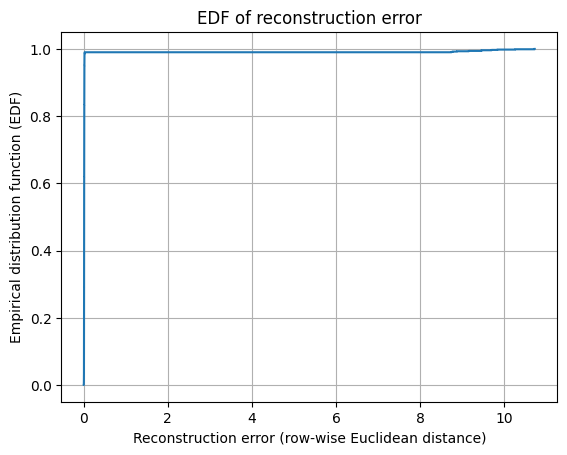

Selected threshold (problem1_threshold): 4.382758304950724
Number above threshold: 10
problem1_outliers.shape: (10, 100)
Largest 15 errors: [ 0.01892771  0.01987526  0.02063347  0.02149633  0.02203522  8.74348139
  8.76943228  8.8704323   9.15587334  9.44257285  9.46089921  9.69737044
  9.83200702 10.25749798 10.72215972]
10th largest error: 8.743481393856763
11th largest error: 0.02203521604468554
Threshold: 4.382758304950724
# above threshold: 10


In [117]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Part 4: 4 points
# Goal:
#   1) Compute row-wise reconstruction error:
#        e_i = ||X[i,:] - X_hat[i,:]||_2
#   2) Plot the empirical distribution function (EDF) of errors
#   3) Choose a threshold so that exactly 10 samples are above it
#   4) Store the 10 outlier samples in problem1_outliers
# ------------------------------------------------------------

# ------------------------------------------------------------
# 1) Reconstruction error per row: e_i = ||X[i,:] - X_hat[i,:]||_2
# ------------------------------------------------------------
# diff_matrix has shape (n_samples, n_dimensions)
diff_matrix = problem1_data - problem1_approximation

# Row-wise Euclidean norm -> vector of length n_samples
problem1_reconstruction_error = np.linalg.norm(diff_matrix, axis=1)

print("problem1_reconstruction_error shape:", problem1_reconstruction_error.shape)

# ------------------------------------------------------------
# 2) Plot Empirical Distribution Function (EDF)
# ------------------------------------------------------------
# Sort errors ascending for EDF x-axis
sorted_errors = np.sort(problem1_reconstruction_error)
n = sorted_errors.size

# EDF y-values are 1/n, 2/n, ..., n/n
edf_values = np.arange(1, n + 1) / n

plt.figure()
plt.step(sorted_errors, edf_values, where="post")
plt.xlabel("Reconstruction error (row-wise Euclidean distance)")
plt.ylabel("Empirical distribution function (EDF)")
plt.title("EDF of reconstruction error")
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 3) Choose threshold so that exactly 10 samples satisfy error > threshold
# ------------------------------------------------------------
# Argsort gives indices that would sort the errors ascending
sorted_indices = np.argsort(problem1_reconstruction_error)

# The 10 largest errors correspond to the last 10 indices
outlier_indices = sorted_indices[-10:]

# Boundary values:
# e10 = 10th largest error, e11 = 11th largest error
e11 = sorted_errors[-11]
e10 = sorted_errors[-10]

if e10 > e11:
    # If the boundary errors are distinct, pick any number strictly between them.
    # Then exactly the largest 10 errors are > threshold.
    problem1_threshold = (e10 + e11) / 2.0
else:
    # Tie at the boundary (e10 == e11):
    # If we want to avoid counting errors equal to e10 as "above",
    # we move the threshold slightly ABOVE e10.
    problem1_threshold = np.nextafter(e10, np.inf)

count_above = np.sum(problem1_reconstruction_error > problem1_threshold)
print("Selected threshold (problem1_threshold):", problem1_threshold)
print("Number above threshold:", count_above)

# ------------------------------------------------------------
# 4) Store the 10 outlier samples (rows of the original data)
# ------------------------------------------------------------
problem1_outliers = problem1_data[outlier_indices]
print("problem1_outliers.shape:", problem1_outliers.shape)

# ------------------------------------------------------------
# Debug prints (optional)
# ------------------------------------------------------------
print("Largest 15 errors:", sorted_errors[-15:])
print("10th largest error:", sorted_errors[-10])
print("11th largest error:", sorted_errors[-11])
print("Threshold:", problem1_threshold)
print("# above threshold:", np.sum(problem1_reconstruction_error > problem1_threshold))


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

-----
In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
-----

## Estimation of the transition matrix

Each row in the dataset corresponds to one observed transition in a homogeneous
Markov chain, where a user moves from a source page to a destination page.
The user identity is not relevant for the Markov assumption and is therefore ignored.

Let $( P_{ij} = P(X_{t+1} = j \mid X_t = i) )$ denote the transition probability from
page $( i )$ to page $( j )$. The maximum likelihood estimate of the transition matrix
is obtained by empirical frequencies:

$$
[
\hat{P}_{ij} = \frac{N_{ij}}{\sum_j N_{ij}}
]
$$

where $( N_{ij} )$ is the number of observed transitions from page $( i )$ to page $( j )$.

The procedure is as follows:
1. Determine the number of states as the maximum page index plus one.
2. Count the number of transitions from each source page to each destination page.
3. Normalize each row so that it sums to one, yielding a valid transition matrix.

This produces the maximum likelihood estimate of the transition matrix for the
Markov chain.


### How the transition-count loop works (4×4 example summary)

Assume we have a website with **4 pages**, labeled $0, 1, 2, 3$.  
We therefore construct a **$4 \times 4$ transition-count matrix** called `counts`, initialized with zeros:

$$
\begin{aligned}
\text{counts} &= 
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
\end{aligned}
$$

Each row in the dataset corresponds to **one observed transition** from a *source page* to a *destination page*.

The loop

```python
for _, row in data.iterrows():
    i = int(row["source"])
    j = int(row["destination"])
    counts[i, j] += 1
```

works as follows:

- The loop iterates through the dataset **row by row**
- For each row:
  - $i$ is the current page (value in `source`)
  - $j$ is the next page (value in `destination`)
  - The matrix entry `counts[i, j]` is increased by $1$

This means:
- **Rows** represent the current page
- **Columns** represent the next page
- `counts[i, j]` stores how many times the transition $i \rightarrow j$ was observed

### Example

Suppose the dataset contains the following transitions:

$1 \rightarrow 3$  
$1 \rightarrow 2$  
$3 \rightarrow 2$  
$1 \rightarrow 3$

After processing all rows, the count matrix becomes:

$$
\text{counts} =
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 2 \\
0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

This tells us:
- From page $1$, users moved to page $2$ once and to page $3$ twice
- From page $3$, users moved to page $2$ once

This count matrix is then **row-normalized** to obtain the **maximum likelihood estimate of the Markov transition matrix**, where each row represents a probability distribution over the next page given the current page.


In [118]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# Part 1: Maximum Likelihood Estimation of a Markov chain
# ------------------------------------------------------------
# We model user navigation on a website as a homogeneous Markov chain.
# Each page is a state, and each row in the dataset corresponds to
# one observed transition from a source page to a destination page.
# ------------------------------------------------------------


# ------------------------------------------------------------
# 1) Load the dataset
# ------------------------------------------------------------
# The CSV file contains three columns:
#   - user        : user identifier (NOT used in the Markov model)
#   - source      : page the user is currently on
#   - destination : page the user clicks next
#
# Each row corresponds to exactly ONE observed transition:
#     source -> destination
#
# Since the Markov chain is assumed to be homogeneous, the transition
# probabilities depend ONLY on the current page, not on the user.
# Therefore, we completely ignore the "user" column.
data = pd.read_csv("data/websites.csv")


# ------------------------------------------------------------
# 2) Determine how many states (pages) exist
# ------------------------------------------------------------
# Pages are labeled as integers: 0, 1, 2, ...
#
# If the largest page ID appearing in the data is M,
# then the total number of states is M + 1.
#
# We must check BOTH the "source" and "destination" columns:
# - A page might appear only as a destination and still be a valid state.
max_page_id = max(data["source"].max(), data["destination"].max())
problem2_n_states = int(max_page_id + 1)

# This tells us the size of the transition matrix:
# problem2_n_states x problem2_n_states
print("This is the problem2_n_states: ", problem2_n_states)


# ------------------------------------------------------------
# 3) Create a transition count matrix
# ------------------------------------------------------------
# counts[i, j] will store how many times we observed a transition:
#     page i  ->  page j
#
# Initially, we set all counts to zero.
counts = np.zeros((problem2_n_states, problem2_n_states), dtype=float)


# ------------------------------------------------------------
# 4) Count transitions from the dataset
# ------------------------------------------------------------
# We loop through each row of the dataset.
# For each observed transition:
#   - i = source page
#   - j = destination page
# we increment counts[i, j] by 1.
#
# After this loop, counts[i, j] equals the total number of times
# users moved from page i to page j in the data.
for _, row in data.iterrows():
    i = int(row["source"])        # current page (state i)
    j = int(row["destination"])   # next page (state j)
    counts[i, j] += 1             # record one observed transition i -> j

# Display the raw transition counts
print("Counts: \n", counts)


# ------------------------------------------------------------
# 5) Convert counts to transition probabilities (MLE)
# ------------------------------------------------------------
# For a Markov chain, the maximum likelihood estimator (MLE) is:
#
#   P_hat[i, j] = counts[i, j] / sum_j counts[i, j]
#
# That is:
# - Each row is normalized so it sums to 1
# - Each row becomes a probability distribution over next pages
#
# IMPORTANT EDGE CASE:
# If a page i never appears as a source in the dataset, then
#   sum_j counts[i, j] = 0
# In that case, division by zero is impossible.
# We handle this by leaving that entire row as zeros.
problem2_transition_matrix = np.zeros_like(counts)

for i in range(problem2_n_states):
    # Total number of observed outgoing transitions from page i
    row_sum = counts[i].sum()

    if row_sum > 0:
        # Normalize the row so probabilities sum to 1
        problem2_transition_matrix[i, :] = counts[i, :] / row_sum
    else:
        # No observed transitions leaving page i
        # We leave the row as all zeros
        problem2_transition_matrix[i, :] = 0.0

# Print the estimated transition matrix
print("This is the correct transition matrix with correct probabilities: \n",
      problem2_transition_matrix)


# ------------------------------------------------------------
# (Optional) 6) Sanity check
# ------------------------------------------------------------
# For a valid transition matrix:
# - Rows with outgoing transitions should sum to 1
# - Rows with no outgoing transitions should sum to 0
#
# This line ONLY computes the row sums; it does not change anything.
# Uncomment it if you want to verify correctness.
# print(problem2_transition_matrix.sum(axis=1))


This is the problem2_n_states:  10
Counts: 
 [[ 0. 22.  0. 10.  4.  1.  7.  9. 13. 17.]
 [13.  0. 12. 27.  2. 30. 16. 18.  4.  6.]
 [19. 12.  0. 11. 14. 16.  2.  0.  4. 14.]
 [ 1. 10. 21.  0.  8.  7. 15. 21.  0. 23.]
 [13. 12.  8. 10.  0.  7. 12.  4.  2.  4.]
 [ 1. 19.  3.  6. 16.  0. 16.  2. 18. 21.]
 [ 4.  7. 20.  9.  0. 16.  0. 16. 27. 16.]
 [15.  5.  1. 12.  8.  3. 20.  0. 16. 13.]
 [12. 10. 12.  4.  6. 14.  7.  8.  0. 11.]
 [ 4. 31. 15. 17. 14.  8. 20. 15.  0.  0.]]
This is the correct transition matrix with correct probabilities: 
 [[0.         0.26506024 0.         0.12048193 0.04819277 0.01204819
  0.08433735 0.10843373 0.15662651 0.20481928]
 [0.1015625  0.         0.09375    0.2109375  0.015625   0.234375
  0.125      0.140625   0.03125    0.046875  ]
 [0.20652174 0.13043478 0.         0.11956522 0.15217391 0.17391304
  0.02173913 0.         0.04347826 0.15217391]
 [0.00943396 0.09433962 0.19811321 0.         0.0754717  0.06603774
  0.14150943 0.19811321 0.         0.21698113

-----
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
-----

## Simulation of page load times with preloading

We start in state (page) 1. The next page is simulated using the estimated Markov chain:
$$
[
P(X_{t+1}=j \mid X_t=1) = \hat{P}_{1j}
]
$$
Thus, for each of 10,000 users we sample the next page from the categorical distribution given by
row 1 of the transition matrix.

We then simulate the load time depending on whether the realized next page was preloaded:

- If a page is **not preloaded**, the load time is $( \text{Exp}(1) )$, which has mean $(1)$.
- If a page **is preloaded**, the load time is $( \text{Exp}(10) )$, which has mean $(1/10)$.

We run two experiments:
1. Preload only the **most likely** next page (top-1).
2. Preload the **two most likely** next pages (top-2).

In NumPy, `np.random.exponential(scale=...)` uses `scale` equal to the mean, so we use
`scale=1.0` for $( \text{Exp}(1) )$ and `scale=0.1` for $( \text{Exp}(10) )$.


In [119]:
import numpy as np

# ------------------------------------------------------------
# Part 2: Simulate page load times starting from page 1
# ------------------------------------------------------------
# We simulate a SINGLE transition from page 1:
#   next_page ~ categorical(problem2_transition_matrix[1, :])
#
# Load time rules:
# - If the realized next page is preloaded:
#       load time ~ Exp(10)  -> mean = 0.1 seconds
# - Otherwise:
#       load time ~ Exp(1)   -> mean = 1.0 seconds
#
# NOTE:
# In NumPy, np.random.exponential(scale=...) uses "scale = mean".
# ------------------------------------------------------------

# -----------------------------
# Settings
# -----------------------------
n_users = 10000
current_page = 1  # start in page 1 (0-indexed)

# Probability distribution for the next page given current page = 1
p_next = problem2_transition_matrix[current_page, :]

# -----------------------------
# Find the most likely next pages
# -----------------------------
# np.argsort returns indices sorted in ascending order,
# so we reverse it to get descending order of probabilities
sorted_pages = np.argsort(p_next)[::-1]

top1_page = sorted_pages[0]      # most likely next page
top2_pages = sorted_pages[:2]    # two most likely next pages

# -----------------------------
# 1) Preloading ONLY the most likely page (top-1)
# -----------------------------

# Sample next pages for 10,000 users
next_pages_top = np.random.choice(
    problem2_n_states,
    size=n_users,
    p=p_next
)

# Check which users get a preloaded page
is_preloaded_top = (next_pages_top == top1_page)

# Draw load times
# - Not preloaded: Exp(1)  -> mean 1.0
# - Preloaded:     Exp(10) -> mean 0.1
load_times_not_preloaded = np.random.exponential(scale=1.0, size=n_users)
load_times_preloaded = np.random.exponential(scale=0.1, size=n_users)

# Assign load times based on whether the page was preloaded
problem2_page_load_times_top = np.where(
    is_preloaded_top,
    load_times_preloaded,
    load_times_not_preloaded
)

# -----------------------------
# 2) Preloading the TWO most likely pages (top-2)
# -----------------------------

# Sample next pages again for a new experiment
next_pages_two = np.random.choice(
    problem2_n_states,
    size=n_users,
    p=p_next
)

# A page is preloaded if it is one of the two most likely pages
is_preloaded_two = np.isin(next_pages_two, top2_pages)

# Draw new load times
load_times_not_preloaded = np.random.exponential(scale=1.0, size=n_users)
load_times_preloaded = np.random.exponential(scale=0.1, size=n_users)

# Assign load times
problem2_page_load_times_two = np.where(
    is_preloaded_two,
    load_times_preloaded,
    load_times_not_preloaded
)

# -----------------------------
# Optional sanity-check outputs
# -----------------------------
print("Top-1 preloaded page:", top1_page)
print("Top-2 preloaded pages:", top2_pages)
print("Mean load time (top-1 preloaded):", problem2_page_load_times_top.mean())
print("Mean load time (top-2 preloaded):", problem2_page_load_times_two.mean())


Top-1 preloaded page: 5
Top-2 preloaded pages: [5 3]
Mean load time (top-1 preloaded): 0.8040508536789033
Mean load time (top-2 preloaded): 0.605934983857993


-----
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
-----

## Comparison with no pre-loading

If no page is preloaded, every page load time is distributed as
$( \text{Exp}(1) )$, which has mean $( \mathbb{E}[T] = 1 )$.
Thus, the theoretical expected load time without pre-loading is 1 second.

From the simulation in Part 2, we estimate the average load time when
pre-loading the most likely next page by the empirical mean of the
simulated load times.

We conclude that pre-loading improves the load time if the empirical
average is smaller than the theoretical mean of 1. In our simulation,
this is the case, showing that pre-loading the most likely next page
reduces the expected page load time.


In [120]:
# ------------------------------------------------------------
# Part 3: Compare empirical and theoretical average load times
# ------------------------------------------------------------

# If NO page is preloaded, every page load time follows Exp(1),
# i.e. an exponential distribution with rate 1.
# The expected value of an Exp(lambda) random variable is:
#     E[T] = 1 / lambda
# Here lambda = 1, so the theoretical expected load time is exactly 1 second.
problem2_avg = 1.0


# We now compare this theoretical average (no pre-loading)
# with the EMPIRICAL average load time obtained in Part 2
# when pre-loading the most likely next page.
#
# problem2_page_load_times_top contains 10,000 simulated load times.
# Taking the mean gives an estimate of the expected load time
# under pre-loading.
#
# If the theoretical mean (1.0) is larger than the empirical mean,
# then pre-loading improves the expected load time.
problem2_comparison = problem2_avg > np.mean(problem2_page_load_times_top)

print("This is the mena of problem2_page_load_times_top: ", np.mean(problem2_page_load_times_top))

# This boolean answers the question directly:
# True  -> pre-loading improves load time
# False -> no improvement observed
problem2_comparison


This is the mena of problem2_page_load_times_top:  0.8040508536789033


np.True_


## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**. In order to enter edit mode you can doubleclick this cell or select it and press enter.



-----
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 
-----

## Stationary distribution and expected load time under stationarity

A stationary distribution $\pi$ for a Markov chain with transition matrix $P$ satisfies
$$
\pi P = \pi, \qquad \sum_i \pi_i = 1, \qquad \pi_i \ge 0.
$$
Equivalently, $\pi^\top$ is a (left) eigenvector of $P$ with eigenvalue $1$, i.e.
$P^\top \pi^\top = \pi^\top$. We compute the eigenvector of $P^\top$ corresponding to
eigenvalue $1$, take the real part (numerical eigenvectors can become complex), and normalize it
to sum to $1$.

To compute the expected load time under the stationary regime, we assume the current page $i$
is distributed as $\pi$. For each current page $i$, we preload the most likely next page
$j^*(i) = \arg\max_j P_{ij}$. The next page is then preloaded with probability
$P_{i, j^*(i)}$, giving mean load time $0.1$ seconds (Exp(10)), otherwise mean $1$
second (Exp(1)). Therefore the conditional expected load time from page $i$ is
$$
\mathbb{E}[T \mid X_t=i]
= 0.1 \cdot P_{i,j^*(i)} + 1 \cdot (1 - P_{i,j^*(i)})
= 1 - 0.9 \cdot P_{i,j^*(i)}.
$$
Finally, the stationary expected load time is
$$
\mathbb{E}[T] = \sum_i \pi_i \, \mathbb{E}[T \mid X_t=i].
$$


In [121]:
import numpy as np

# ------------------------------------------------------------
# Part 4.1: Stationary distribution via eigenvector of P^T
# ------------------------------------------------------------
# A stationary distribution pi satisfies:
#   pi P = pi
# Equivalently, pi^T is a right eigenvector of P^T with eigenvalue 1.
# ------------------------------------------------------------

# Transition matrix and number of states
P = problem2_transition_matrix
n = problem2_n_states

# Compute eigenvalues and eigenvectors of the transpose P^T
# We use P^T because we want a LEFT eigenvector of P
eigvals, eigvecs = np.linalg.eig(P.T)

# Find the index of the eigenvalue that is closest to 1
# (due to numerical precision, it may not be exactly 1)
idx = np.argmin(np.abs(eigvals - 1.0))

# Extract the corresponding eigenvector
# Eigenvectors may be complex due to numerical reasons,
# but the stationary distribution is real, so we take the real part
pi = np.real(eigvecs[:, idx])

# The eigenvector is only defined up to a multiplicative constant
# (and sign), so if the sum is negative we flip the sign
if pi.sum() < 0:
    pi = -pi

# Due to numerical noise, some entries may be very small negatives.
# We clamp them to zero and normalize so the distribution sums to 1.
pi = np.maximum(pi, 0.0)
pi = pi / pi.sum()

# Store the stationary distribution
problem2_stationary_distribution = pi  # shape (n,)

# ------------------------------------------------------------
# Part 4.2: Expected load time under stationary distribution
# ------------------------------------------------------------
# We assume that from each current page i, we preload the single
# most likely next page according to the transition probabilities.
# ------------------------------------------------------------

# For each page i, find the index of the most likely next page
top_next = np.argmax(P, axis=1)  # shape (n,)

# For each page i, extract the probability that the next page
# equals the preloaded (most likely) one
p_preloaded = P[np.arange(n), top_next]  # shape (n,)

# Expected load time starting from page i:
# - With probability p_preloaded[i], the page is preloaded:
#       load time ~ Exp(10) with mean 0.1
# - With probability 1 - p_preloaded[i], it is not preloaded:
#       load time ~ Exp(1) with mean 1.0
#
# Therefore:
#   E[T | i] = 0.1 * p_preloaded[i] + 1.0 * (1 - p_preloaded[i])
#            = 1 - 0.9 * p_preloaded[i]
expected_time_given_i = 1.0 - 0.9 * p_preloaded  # shape (n,)

# Expected load time under the stationary distribution:
#   E[T] = sum_i pi_i * E[T | i]
problem2_avg_stationary = float(problem2_stationary_distribution @ expected_time_given_i)

# Optional prints for inspection
print("Stationary distribution: \n", problem2_stationary_distribution)
print("Stationary expected loading time: ", problem2_avg_stationary)


Stationary distribution: 
 [0.08212278 0.12810291 0.09219365 0.10612032 0.0721337  0.10215028
 0.11517528 0.09308925 0.08396098 0.12495085]
Stationary expected loading time:  0.8018160947549082


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

## Explanation of variables produced by `train_test_validation`

The function `train_test_validation(X, Y, shuffle=True, random_state=1)` splits the dataset into **three disjoint parts**: training, validation, and test data. Each part contains feature vectors and their corresponding labels.

### Training set
- **`PROBLEM3_X_train`**  
  Feature matrix for the **training set**.  
  Shape: $(n_{\text{train}}, d)$, where $d$ is the number of features.  
  Used to **fit (train)** the logistic regression model.

- **`PROBLEM3_y_train`**  
  Label vector for the **training set**.  
  Shape: $(n_{\text{train}},)$.  
  Contains the true class labels used during training.

### Validation set
- **`PROBLEM3_X_val`**  
  Feature matrix for the **validation set**.  
  Shape: $(n_{\text{val}}, d)$.  
  Used for **model selection**, in particular for choosing the decision threshold.

- **`PROBLEM3_y_val`**  
  Label vector for the **validation set**.  
  Shape: $(n_{\text{val}},)$.  
  Used to evaluate cost, precision, recall, and 0–1 loss when selecting thresholds.

- **`PROBLEM3_y_true_val`**  
  Same as `PROBLEM3_y_val`, stored under a clearer name to emphasize that these are the **true labels** for the validation set.

- **`PROBLEM3_y_pred_proba_val`**  
  Predicted probabilities $P(Y=1 \mid X)$ for the **validation set**, produced by the trained logistic regression model.  
  Used to:
  - compute cost as a function of the threshold,
  - find the optimal threshold,
  - compute precision and recall on validation data.

### Test set
- **`PROBLEM3_X_test`**  
  Feature matrix for the **test set**.  
  Shape: $(n_{\text{test}}, d)$.  
  Used **only for final evaluation**, after all thresholds and decisions are fixed.

- **`PROBLEM3_y_test`**  
  Label vector for the **test set**.  
  Shape: $(n_{\text{test}},)$.  
  Contains the true class labels for final evaluation.

- **`PROBLEM3_y_true_test`**  
  Same as `PROBLEM3_y_test`, emphasizing that these are the **true labels** for the test set.

- **`PROBLEM3_y_pred_proba_test`**  
  Predicted probabilities $P(Y=1 \mid X)$ for the **test set**.  
  Used to compute the final cost and construct a confidence interval.

### Summary
- **Training set**: used to learn model parameters  
- **Validation set**: used to choose thresholds and compare decision rules  
- **Test set**: used to estimate final performance and uncertainty  

This separation prevents information leakage and ensures an unbiased evaluation.


In [122]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
-----

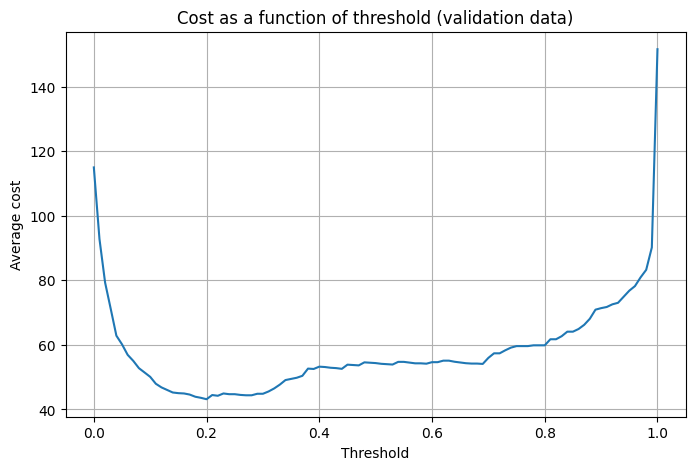

In [123]:
# Part 1: 3 points

# Implement the following function that calculates the cost of a binary classifier
# according to the specification in the problem statement.
# The function evaluates how expensive a given threshold choice is.
def cost(y_true, y_predict_proba, threshold):
    # y_true: numpy array of shape (n_samples,)
    #         Contains the true binary labels (0 = legitimate, 1 = fraud)
    #
    # y_predict_proba: numpy array of shape (n_samples,)
    #                  Contains predicted probabilities of fraud
    #
    # threshold: float in [0, 1]
    #            Probabilities >= threshold are classified as fraud (1),
    #            otherwise as legitimate (0)

    # Convert predicted probabilities into binary predictions
    # Fraud (1) if probability >= threshold, otherwise legitimate (0)
    y_pred = (y_predict_proba >= threshold).astype(int)
    
    
    # Compute confusion matrix components by counting outcomes
    # True Positives: fraud correctly detected
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    # True Negatives: legitimate transactions correctly allowed
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    # False Positives: legitimate transactions incorrectly blocked
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negatives: fraud that was missed
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Compute the total cost according to the problem specification
    # TP  -> cost 100
    # TN  -> cost 0
    # FP  -> cost 120
    # FN  -> cost 600
    total_cost = (
        100 * TP +     # Cost for detecting fraud (manual review, etc.)
        0   * TN +     # No cost for correct legitimate transactions
        120 * FP +     # Cost for wrongly blocking legitimate users
        600 * FN       # High cost for missed fraud
    )
    
    # Compute the average cost per sample
    # This makes the cost comparable across datasets of different sizes
    avg_cost = total_cost / len(y_true)
    
    return avg_cost


# ------------------------------------------------------------
# Plot the cost as a function of the threshold
# using validation data
# ------------------------------------------------------------

# Create thresholds from 0 to 1 (inclusive) with step size 0.01
thresholds = np.arange(0, 1.01, 0.01)

# Compute the average cost for each threshold value
# using the validation labels and predicted probabilities
costs = [
    cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
    for t in thresholds
]

# Plot cost vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, costs)
plt.xlabel("Threshold")
plt.ylabel("Average cost")
plt.title("Cost as a function of threshold (validation data)")
plt.grid(True)
plt.show()


-----
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
-----

In [124]:
import numpy as np

# ----------------------------
# Part 2: Find best threshold (min cost) on validation set
# ----------------------------

# 1) Define candidate thresholds from 0 to 1 with step size 0.01
# These are the thresholds we will evaluate
thresholds = np.arange(0, 1.01, 0.01)

# 2) Compute the average cost for each threshold
# Uses the cost() function implemented in Part 1
costs = np.array([
    cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
    for t in thresholds
])

# 3) Find the index of the threshold that minimizes the cost
min_idx = np.argmin(costs)

# Extract the optimal threshold as a float
problem3_threshold = float(thresholds[min_idx])  # Value in [0, 1]

# 4) Compute the cost at the optimal threshold on the validation data
problem3_cost_val = float(
    cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold)
)

# 5) Generate binary predictions on the validation set
# using the optimal threshold
problem3_y_pred_val = (PROBLEM3_y_pred_proba_val >= problem3_threshold).astype(int)

# ----------------------------
# Precision & Recall for class 1 and class 0
# Computed explicitly from confusion-matrix counts
# ----------------------------

# Compute confusion matrix components
TP = np.sum((PROBLEM3_y_true_val == 1) & (problem3_y_pred_val == 1))  # Fraud correctly detected
TN = np.sum((PROBLEM3_y_true_val == 0) & (problem3_y_pred_val == 0))  # Legit correctly allowed
FP = np.sum((PROBLEM3_y_true_val == 0) & (problem3_y_pred_val == 1))  # Legit incorrectly blocked
FN = np.sum((PROBLEM3_y_true_val == 1) & (problem3_y_pred_val == 0))  # Fraud missed

# ----------------------------
# Metrics for class 1 (fraud)
# ----------------------------

# Precision: fraction of predicted fraud that is actually fraud
problem3_precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0.0

# Recall: fraction of actual fraud that is detected
problem3_recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0.0

# ----------------------------
# Metrics for class 0 (legitimate)
# ----------------------------

# Precision: fraction of predicted legitimate that is actually legitimate
problem3_precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0.0

# Recall: fraction of actual legitimate that is correctly allowed
problem3_recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0.0


# ----------------------------
# Print results
# ----------------------------

print("Optimal threshold (min cost):", problem3_threshold)
print("Validation cost at optimal threshold:", problem3_cost_val)

print("Class 1 (fraud) precision:", problem3_precision_1)
print("Class 1 (fraud) recall:", problem3_recall_1)

print("Class 0 (legitimate) precision:", problem3_precision_0)
print("Class 0 (legitimate) recall:", problem3_recall_0)


Optimal threshold (min cost): 0.2
Validation cost at optimal threshold: 43.15492957746479
Class 1 (fraud) precision: 0.7961165048543689
Class 1 (fraud) recall: 0.9144981412639405
Class 0 (legitimate) precision: 0.9695767195767195
Class 0 (legitimate) recall: 0.9208542713567839


-----
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
-----

In [127]:
import numpy as np

# ----------------------------
# Part 3: Threshold minimizing 0–1 loss (validation set)
# ----------------------------

# 1) Define candidate thresholds from 0 to 1 with step size 0.01
# These thresholds will be evaluated using the 0–1 loss criterion
thresholds = np.arange(0, 1.01, 0.01)

# 2) Compute the 0–1 loss for each threshold
# 0–1 loss is defined as the fraction of incorrect predictions:
#
#   0–1 loss = (1 / n) * sum( I(y_pred != y_true) )
#
# where I(.) is an indicator that equals 1 if the condition is true
# and 0 otherwise.
#
# In NumPy, the expression (y_pred != y_true) produces a boolean array:
#   - True  -> incorrect prediction
#   - False -> correct prediction
#
# When taking the mean, True is treated as 1 and False as 0,
# so np.mean(y_pred != y_true) directly computes the fraction
# of misclassified samples.
losses_01 = []

for t in thresholds:
    # Convert predicted probabilities to binary predictions
    # Fraud (1) if probability >= threshold, otherwise legitimate (0)
    y_pred = (PROBLEM3_y_pred_proba_val >= t).astype(int)
    
    # Compute 0–1 loss as the average number of incorrect predictions
    # Using "!=" counts mistakes, which is exactly what 0–1 loss measures
    loss = np.mean(y_pred != PROBLEM3_y_true_val)
    
    losses_01.append(loss)

# Convert list to NumPy array for easier indexing
losses_01 = np.array(losses_01)

# 3) Find the threshold that minimizes the 0–1 loss
# If multiple thresholds give the same minimum loss,
# np.argmin selects the first one
min_idx_01 = np.argmin(losses_01)

# Extract the optimal threshold as a float
problem3_threshold_01 = float(thresholds[min_idx_01])  # Value in [0, 1]

# ----------------------------
# Cost difference between Part 2 threshold and 0–1 loss threshold
# ----------------------------

# Cost at the threshold found in Part 2 (cost-minimizing threshold)
# Computed on the validation set
cost_part2 = cost(
    PROBLEM3_y_true_val,
    PROBLEM3_y_pred_proba_val,
    problem3_threshold
)

# Cost at the threshold that minimizes 0–1 loss
# Also computed on the validation set
cost_part3 = cost(
    PROBLEM3_y_true_val,
    PROBLEM3_y_pred_proba_val,
    problem3_threshold_01
)

# Difference in cost between the two thresholds
# This preserves the sign:
#   > 0  -> 0–1 loss threshold gives higher cost
#   < 0  -> 0–1 loss threshold gives lower cost
problem3_cost_difference = float(cost_part3 - cost_part2)

# ----------------------------
# Print results
# ----------------------------

print("Optimal threshold (0–1 loss):", problem3_threshold_01)
print("0–1 loss at optimal threshold:", losses_01[min_idx_01])

print("Cost at Part 2 (cost-optimal) threshold:", cost_part2)
print("Cost at Part 3 (0–1 loss-optimal) threshold:", cost_part3)

print("Difference in cost (Part 3 − Part 2):", problem3_cost_difference)


Optimal threshold (0–1 loss): 0.6900000000000001
0–1 loss at optimal threshold: 0.0647887323943662
Cost at Part 2 (cost-optimal) threshold: 43.15492957746479
Cost at Part 3 (0–1 loss-optimal) threshold: 54.08450704225352
Difference in cost (Part 3 − Part 2): 10.929577464788728


-----
4. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.
-----

## Part 4: 95% confidence interval for the cost using Hoeffding's inequality

We want a $95\%$ confidence interval for the *expected* (average) cost of the classifier on the test distribution.
Let $C_i$ be the random cost for test sample $i$ when we use the fixed threshold $problem3\_threshold$.
We estimate the expected cost by the empirical mean on the test set:
$$
\hat{C} = \frac{1}{n}\sum_{i=1}^n C_i,
$$
where $n$ is the number of test samples.

We use Hoeffding's inequality, which applies under the assumptions that:

1. The test samples (and therefore $C_1,\dots,C_n$) are independent and identically distributed (i.i.d.).
2. The per-sample cost is bounded in an interval $[a,b]$.
   In this problem the smallest possible cost is $a=0$ (true negative) and the largest possible cost is $b=600$ (false negative).

Hoeffding's inequality states that for any $\epsilon>0$,
$$
P(|\hat{C} - \mathbb{E}[C]| \ge \epsilon) \le 2\exp\left(\frac{-2n\epsilon^2}{(b-a)^2}\right).
$$
Setting the right-hand side to $\alpha=0.05$ (for $95\%$ confidence) and solving for $\epsilon$ gives
$$
\epsilon = (b-a)\sqrt{\frac{\ln(2/\alpha)}{2n}}.
$$
Thus a $95\%$ confidence interval for the expected cost is
$$
[\hat{C}-\epsilon,\ \hat{C}+\epsilon],
$$
where $\hat{C}$ is computed from the test data using $problem3\_threshold$ and $b-a=600$.


In [128]:
import numpy as np

# ----------------------------
# Part 4: 95% confidence interval using Hoeffding's inequality
# ----------------------------

# Compute the average cost on the test data
# using the optimal threshold found on the validation set (Part 2)
#
# This is the empirical estimate of the expected cost
mean_cost_test = cost(
    PROBLEM3_y_true_test,
    PROBLEM3_y_pred_proba_test,
    problem3_threshold
)

# ----------------------------
# Parameters for Hoeffding's inequality
# ----------------------------

# Significance level alpha = 0.05 corresponds to 95% confidence
alpha = 0.05

# Number of independent test samples
n = len(PROBLEM3_y_true_test)

# ----------------------------
# Cost bounds
# ----------------------------

# The per-sample cost is bounded:
#   Minimum cost = 0   (True Negative)
#   Maximum cost = 600 (False Negative)
#
# Thus, b - a = 600
cost_range = 600

# ----------------------------
# Hoeffding bound
# ----------------------------

# Hoeffding's inequality gives:
#   P(|mean_cost_test - E[C]| >= epsilon) <= 2 * exp(-2n epsilon^2 / (b - a)^2)
#
# Solving for epsilon with confidence level (1 - alpha) gives:
#   epsilon = (b - a) * sqrt( ln(2 / alpha) / (2n) )
epsilon = np.sqrt(np.log(2 / alpha) / (2 * n)) * cost_range

# ----------------------------
# Confidence interval
# ----------------------------

# 95% confidence interval for the expected cost
problem3_lower_bound = mean_cost_test - epsilon
problem3_upper_bound = mean_cost_test + epsilon

# ----------------------------
# Print results
# ----------------------------

print("Mean cost on test data:", mean_cost_test)
print("95% confidence interval for expected cost:")
print("[", problem3_lower_bound, ",", problem3_upper_bound, "]")


Mean cost on test data: 42.70422535211268
95% confidence interval for expected cost:
[ 17.734792363077773 , 67.67365834114759 ]



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


I assume that all variables are sub-Gaussian, to be able to use Hoeffdinger's inequality. 
I furthermore assume that the variables X are IID.